In [1]:
#导入包
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#周期序列
Q2=np.array([0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18])

In [3]:
#优化了原来的算法（使用斜率）
#输入序列Q和角度a，将角度比a大的连边两点放入arr，角度比a小的连边两点放入arr1，角度和a相等的两点放入arr2。
def getPNVGPoint(Q,a):
    x = np.array(range(1, len(Q) + 1))
    y = np.array(Q)
    k=math.tan(a-math.pi/2)#计算角度a对应的斜率
    #结果集
    arr,arr_ti,arr_tj = [],[],[]#sl>k
    arr1,arr1_ti,arr1_tj = [],[],[]#sl<k
    arr2,arr2_ti,arr2_tj = [],[],[]#sl==k
    #让ti遍历整个Q数据集，不遍历最后一个元素所以为len(Q)-1
    for ti in range(len(Q)-1):
        yi = y[ti]
        # 把每个数据点初始的斜率定义为负无穷小
        sl = float("-inf")
        tj = np.array(range(ti + 1, len(Q)))
        if len(tj) > 0:
            for num in tj:
                yj =y[num]
                sij = (yj - yi) / (num - ti)
                #print(sij)
                if sij >sl:
                    sl = sij
                    #判断斜率是否大于k
                    if sl>k:
                        #添加ij连边
                        arr_ti.append(ti)
                        arr_tj.append(num)
                    elif sl<k:
                        #添加ij连边
                        arr1_ti.append(ti)
                        arr1_tj.append(num)
                    elif sl==k:
                        #添加ij连边
                        arr2_ti.append(ti)
                        arr2_tj.append(num)
                else:
                    next
        else:
            break
    arr=[arr_ti,arr_tj]
    arr1=[arr1_ti,arr1_tj]
    arr2=[arr2_ti,arr2_tj]
    return arr,arr1,arr2

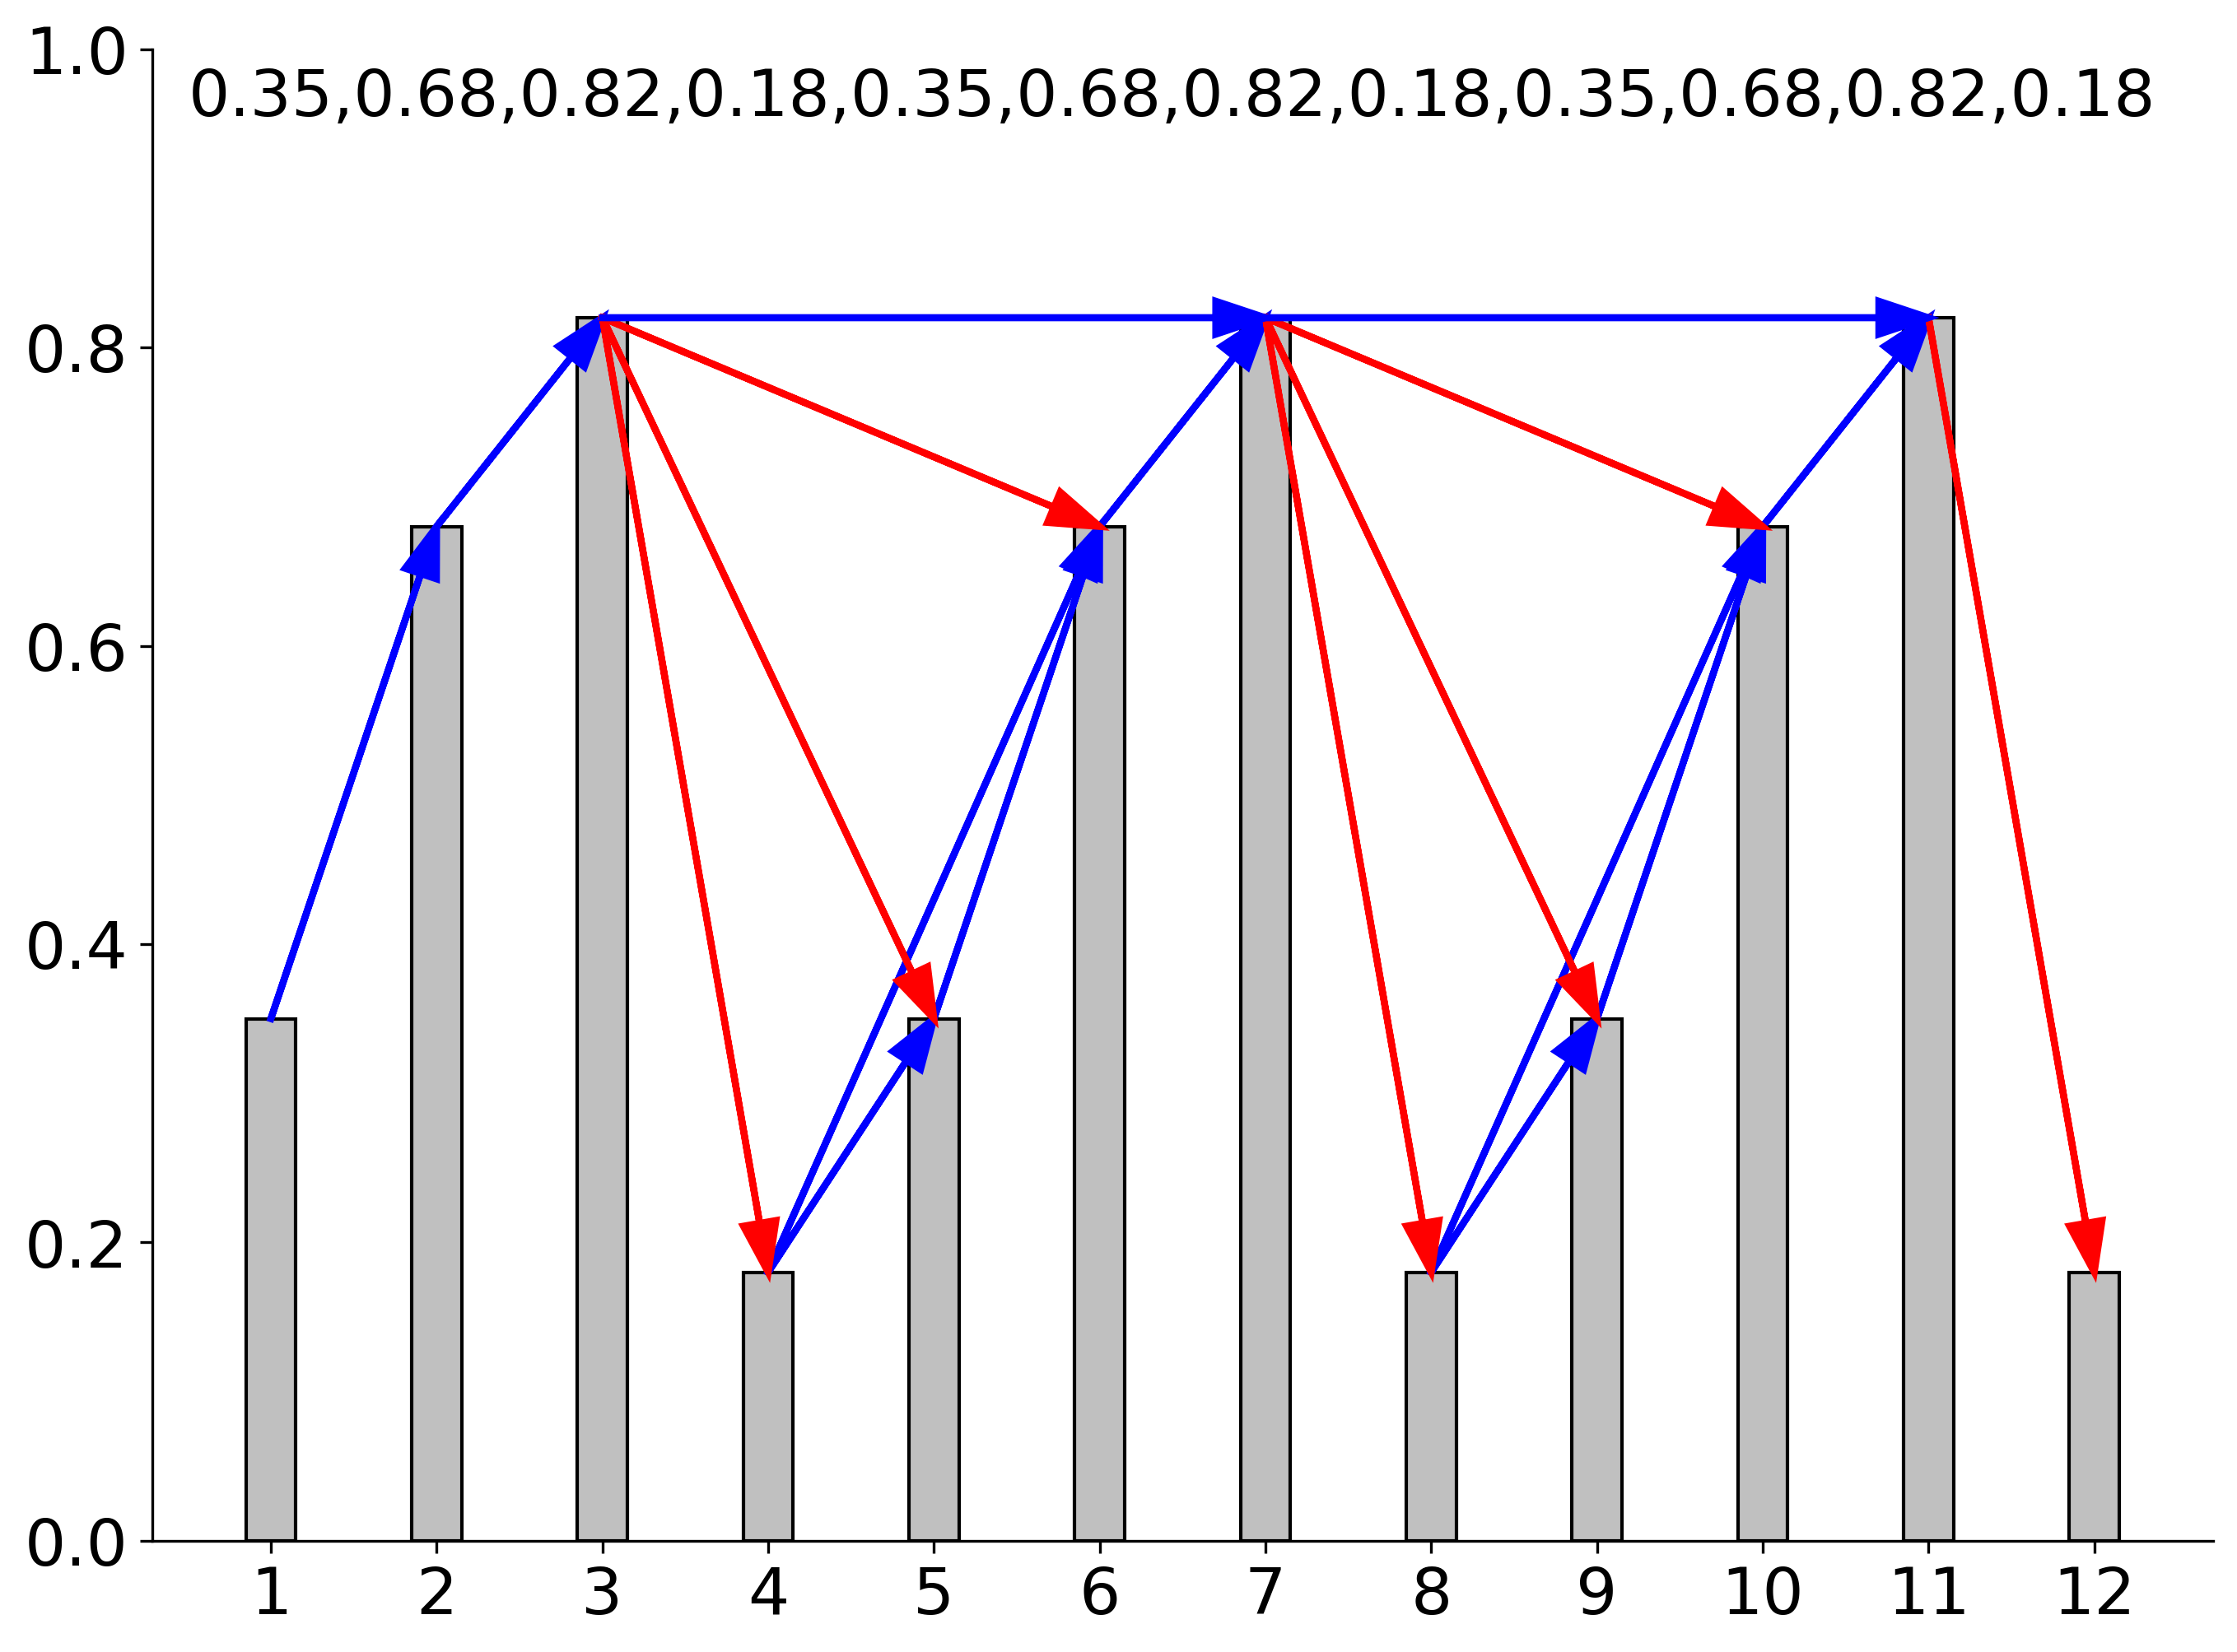

In [4]:
#PNVG_bar函数：输入序列Q和角度a，输出PNVG条形图（需先调用getPNVGPoint函数）
def PNVG_bar(Q,a):
    #准备画布，和一个坐标轴
    fig = plt.figure(figsize=(12, 8), dpi=300)#设置图形大小
    ax = fig.add_subplot(111)
    ax.set_aspect('equal') #x轴y轴等比例
    
    #设置样式
    #ax.set_yticks(Q)#不显示y坐标轴标签
    plt.ylim(0,9)
    plt.tick_params(labelsize=18)
    ax.spines['top'].set_visible(False)#不显示上边框
    ax.spines['right'].set_visible(False)#不显示右边框
    
    #画条形图
    x= np.array(range(0,len(Q)))
    p1=ax.bar(x,Q*9,width=0.3,color='#C0C0C0',edgecolor='black',zorder=10)

    #获取要连接两点的坐标
    arr,arr1,arr2=getPNVGPoint(Q,a)

    #在图中连接(高的)两点
    for i in range(0,len(arr[0])):
        p2=ax.arrow(arr[0][i],Q[arr[0][i]]*9,arr[1][i]-arr[0][i],Q[arr[1][i]]*9-Q[arr[0][i]]*9,color='blue',length_includes_head=True,head_width=0.2, linewidth=2,zorder=11)
    #在图中连接(低的)两点
    for i in range(0,len(arr1[0])):
        p2=ax.arrow(arr1[0][i],Q[arr1[0][i]]*9,arr1[1][i]-arr1[0][i],Q[arr1[1][i]]*9-Q[arr1[0][i]]*9,color='red',length_includes_head=True,head_width=0.2, linewidth=2,zorder=11)
    #在图中连接(中的)两点    
    for i in range(0,len(arr2[0])):
        p2=ax.arrow(arr2[0][i],Q[arr2[0][i]]*9,arr2[1][i]-arr2[0][i],Q[arr2[1][i]]*9-Q[arr2[0][i]]*9,color='blue',length_includes_head=True,head_width=0.2, linewidth=2,zorder=11)
        
    #设置x轴刻度的值（为直方条高度），调整字体大小
    plt.xticks(x,range(1, len(Q) + 1),fontsize=19)
    plt.yticks([0.0*9,0.2*9,0.4*9,0.6*9,0.8*9,1.0*9],[0.0,0.2,0.4,0.6,0.8,1.0],fontsize=19)
    plt.text(-0.5, 8.6, "0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18,0.35,0.68,0.82,0.18", size=19,
         bbox=dict(boxstyle="square",
                  color="#FFFFFF"
                   )
         )
    #显示图像
    plt.rcParams['xtick.direction'] = 'in' #将x轴的刻度线方向设置向内
    plt.rcParams['ytick.direction'] = 'in' #将y轴的刻度方向设置向内
    
    #保存图片
    #plt.savefig('E:\\PNVG_bar.png',bbox_inches="tight",dpi=600)
    
    #显示图像
    plt.show()
    
#调用
PNVG_bar(Q2,math.pi/2)

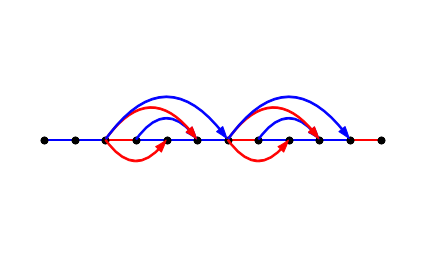

In [5]:
# %matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

def PNVG_net(Q,a):
    arr,arr1,arr2=getPNVGPoint(Q,a)
    x=np.array(range(0,len(Q)))
    G = nx.Graph()        # 无多重边无向图

    #点
    G.add_nodes_from(x)  # 添加多个节点
    
    edge1=[[],[]]#用来保存边，便于判断边是否与某条弧线会有交叉
    for arr in [arr,arr1,arr2]:
        #print(arr)
        #边
        G.clear()
        for i in range(0,len(arr[0])):
            if arr[1][i]-arr[0][i]==1:
                G.add_edges_from([(arr[0][i],arr[1][i])],rad=0)
            else:
                G.add_edges_from([(arr[0][i],arr[1][i])],rad=0.7)
        
        
        #位置
        pos=dict()
        for i in range(len(Q),-1,-1):
            sd={i:(i,0)}
            pos={**sd,**pos}
        
        #画点
        nx.draw_networkx_nodes(G, pos, node_size=42, nodelist=x, node_color="black")

        ax = plt.gca()

        #画边
        for edge in G.edges(data=True):
            edge1[0].append(edge[0])
            edge1[1].append(edge[1])
            
            #判断弧度，画直线部分
            if edge[2]["rad"]==0:
                #判断是否为arr1(arr1是角度小于a的集合),是的话，画红线-----（红色直线）
                if arr==arr1:
                    nx.draw_networkx_edges(G, pos, edgelist=[edge],width=2,edge_color='red', connectionstyle=f'arc3, rad = -{edge[2]["rad"]}')
                #不是的话，画蓝线-----------------------------------------（蓝色直线）
                else:
                    nx.draw_networkx_edges(G, pos, edgelist=[edge],width=2,edge_color='blue', connectionstyle=f'arc3, rad = -{edge[2]["rad"]}')
            #若弧度不为0，画弧线部分
            else:
                for i in range(len(edge1[0])):
                    #判断边是否与某条弧线会有交叉，如果有就在下边画
                    panduan=(edge[0]>edge1[0][i] and edge[0]<edge1[1][i] and edge[1]>edge1[1][i]) or (edge[1]>edge1[0][i] and edge[1]<edge1[1][i] and edge[0]<edge1[0][i])
                    if panduan:
                        #判断是否为arr1,是的话，画红线------------------（下方红色弧线）
                        if arr==arr1:
                            ax.annotate("", xy=[edge[1],0], xytext=[edge[0],0],arrowprops=dict(color="red", shrink=0.01,headwidth=8,width=1.5,connectionstyle=f'arc3, rad = {edge[2]["rad"]}'))
                        #不是的话，画蓝线-------------------------------（下方蓝色弧线）
                        else:
                            ax.annotate("", xy=[edge[1],0], xytext=[edge[0],0],arrowprops=dict(color="blue", shrink=0.01,headwidth=8,width=1.5,connectionstyle=f'arc3, rad ={edge[2]["rad"]}'))
                        break
                #如果没有就在上边画
                if i==len(edge1[0])-1 and not panduan:
                    #判断是否为arr1,是的话，画红线-----------------------（上方红色弧线）
                    if arr==arr1:
                        ax.annotate("",xy=[edge[1],0], xytext=[edge[0],0],arrowprops=dict(color="red", shrink=0.01,headwidth=8,width=1.5,connectionstyle=f'arc3, rad = -{edge[2]["rad"]}'))
                    #不是的话，画蓝线-------------------------------------（上方蓝色弧线）
                    else:
                        ax.annotate("", xy=[edge[1],0], xytext=[edge[0],0],arrowprops=dict(color="blue", shrink=0.01,headwidth=8,width=1.5,connectionstyle=f'arc3, rad = -{edge[2]["rad"]}'))


        ax.margins(0.11)
        plt.tight_layout()
        plt.axis("off")
    #plt.savefig('E:\\PNVG_net.png',dpi=600)
    plt.show()

PNVG_net(Q2,math.pi/2)